Import libraries

In [1]:
#
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

**Task 1. For a given dataset (named dataset1.csv) including 75,000 homebrewed beers with over 176 different styles. Beer records are user-reported and classified according to one of the 176 styles. These recipes go into as much or as little detail as the user provided, but there are at least 5 useful columns where data was entered for each: Original Gravity, Final Gravity, ABV, IBU, and Color**

In [2]:
#
df_dataset1 = pd.read_csv('drive/MyDrive/data/lab2/dataset1.csv', encoding='latin1')
# columns_main = ['OG', 'FG', 'ABV', 'IBU', 'Color']
# df_main = df_dataset1[columns_main]
df_dataset1.head()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


*1.1. Display the general information of the dataset and provide a quick statistical summary of the columns in the dataset.*

In [3]:
# code
df_dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73861 entries, 0 to 73860
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BeerID         73861 non-null  int64  
 1   Name           73859 non-null  object 
 2   URL            73861 non-null  object 
 3   Style          73265 non-null  object 
 4   StyleID        73861 non-null  int64  
 5   Size(L)        73861 non-null  float64
 6   OG             73861 non-null  float64
 7   FG             73861 non-null  float64
 8   ABV            73861 non-null  float64
 9   IBU            73861 non-null  float64
 10  Color          73861 non-null  float64
 11  BoilSize       73861 non-null  float64
 12  BoilTime       73861 non-null  int64  
 13  BoilGravity    70871 non-null  float64
 14  Efficiency     73861 non-null  float64
 15  MashThickness  43997 non-null  float64
 16  SugarScale     73861 non-null  object 
 17  BrewMethod     73861 non-null  object 
 18  PitchR

In [4]:
#
df_dataset1.describe()

,BeerID,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,PitchRate,PrimaryTemp,UserId
count,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,70871.000000,73861.000000,43997.000000,34609.000000,51199.000000,23371.000000
mean,36931.000000,60.179432,43.929775,1.406266,1.075865,6.136865,44.276186,13.404989,49.724919,65.074870,1.353955,66.354881,2.127235,0.750468,19.175641,43078.069188
std,21321.978453,56.811462,180.373492,2.196908,0.432524,1.883510,42.945508,11.944511,193.246427,15.024228,1.930989,14.091686,1.682347,0.394262,4.219676,27734.252556
min,1.000000,1.000000,1.000000,1.000000,-0.003000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.780000,49.000000
25%,18466.000000,10.000000,18.930000,1.051000,1.011000,5.080000,23.370000,5.170000,20.820000,60.000000,1.040000,65.000000,1.500000,0.350000,18.000000,20984.000000
50%,36931.000000,35.000000,20.820000,1.058000,1.013000,5.790000,35.770000,8.440000,27.440000,60.000000,1.047000,70.000000,1.500000,0.750000,20.000000,42897.000000
75%,55396.000000,111.000000,23.660000,1.069000,1.017000,6.830000,56.380000,16.790000,30.000000,60.000000,1.060000,75.000000,3.000000,1.000000,20.000000,57841.000000
max,73861.000000,176.000000,9200.000000,34.034500,23.424600,54.720000,3409.300000,186.000000,9700.000000,240.000000,52.600000,100.000000,100.000000,2.000000,114.000000,134362.000000


*1.2. Identify the missing rate for each attribute and the given dataset's general missing rate.*

In [5]:
# Code

# Ti le thieu du lieu cho tung cot
missing_rate_per_column = df_dataset1.isnull().mean() * 100
print("Missing rate per column:")
print(missing_rate_per_column)

# Ti le thieu du lieu cua toan bo tap du lieu
general_missing_rate = (df_dataset1.isnull().values.mean()) * 100
print("\nGeneral missing rate:")
print(general_missing_rate)

Missing rate per column:
BeerID            0.000000
Name              0.002708
URL               0.000000
Style             0.806921
StyleID           0.000000
Size(L)           0.000000
OG                0.000000
FG                0.000000
ABV               0.000000
IBU               0.000000
Color             0.000000
BoilSize          0.000000
BoilTime          0.000000
BoilGravity       4.048144
Efficiency        0.000000
MashThickness    40.432705
SugarScale        0.000000
BrewMethod        0.000000
PitchRate        53.143066
PrimaryTemp      30.681957
PrimingMethod    90.847673
PrimingAmount    93.536508
UserId           68.358132
dtype: float64

General missing rate:
16.602513652259855


*1.3 Drop attributes with high missing rates (i.e., > 50%)*

In [6]:
# code
columns_to_drop = missing_rate_per_column[missing_rate_per_column > 50].index
df_cleaned = df_dataset1.drop(columns=columns_to_drop)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73861 entries, 0 to 73860
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BeerID         73861 non-null  int64  
 1   Name           73859 non-null  object 
 2   URL            73861 non-null  object 
 3   Style          73265 non-null  object 
 4   StyleID        73861 non-null  int64  
 5   Size(L)        73861 non-null  float64
 6   OG             73861 non-null  float64
 7   FG             73861 non-null  float64
 8   ABV            73861 non-null  float64
 9   IBU            73861 non-null  float64
 10  Color          73861 non-null  float64
 11  BoilSize       73861 non-null  float64
 12  BoilTime       73861 non-null  int64  
 13  BoilGravity    70871 non-null  float64
 14  Efficiency     73861 non-null  float64
 15  MashThickness  43997 non-null  float64
 16  SugarScale     73861 non-null  object 
 17  BrewMethod     73861 non-null  object 
 18  Primar

*1.4 Perform imputation for attributes with low missing rates (using SimpleImputer)*

In [7]:
columns_to_impute = missing_rate_per_column[missing_rate_per_column < 50].index
df_simple_imputer = df_dataset1[columns_to_impute].copy()

num_simple_imputer_cols = df_simple_imputer.select_dtypes(include=['number']).columns
cat_simple_imputer_cols = df_simple_imputer.select_dtypes(include=['object']).columns

num_imputer = SimpleImputer(strategy='mean')
df_simple_imputer[num_simple_imputer_cols] = num_imputer.fit_transform(df_simple_imputer[num_simple_imputer_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
df_simple_imputer[cat_simple_imputer_cols] = cat_imputer.fit_transform(df_simple_imputer[cat_simple_imputer_cols])

# df_imputer.info()
df_simple_imputer.isnull().mean()

,0
BeerID,0.0
Name,0.0
URL,0.0
Style,0.0
StyleID,0.0
Size(L),0.0
OG,0.0
FG,0.0
ABV,0.0
IBU,0.0


*1.5. Perform imputation for attributes with low missing rates (using KNNImputer)*

In [8]:
# code
df_knn_imputer = df_simple_imputer[num_simple_imputer_cols].copy()
knn_imputer = KNNImputer(n_neighbors=5)
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn_imputer), columns=num_simple_imputer_cols)
df_knn_imputed.isnull().mean()

,0
BeerID,0.0
StyleID,0.0
Size(L),0.0
OG,0.0
FG,0.0
ABV,0.0
IBU,0.0
Color,0.0
BoilSize,0.0
BoilTime,0.0


*1.6. Visualize the relationship between bitterness and alcohol content (ABV vs IBU) using the scatter chart*

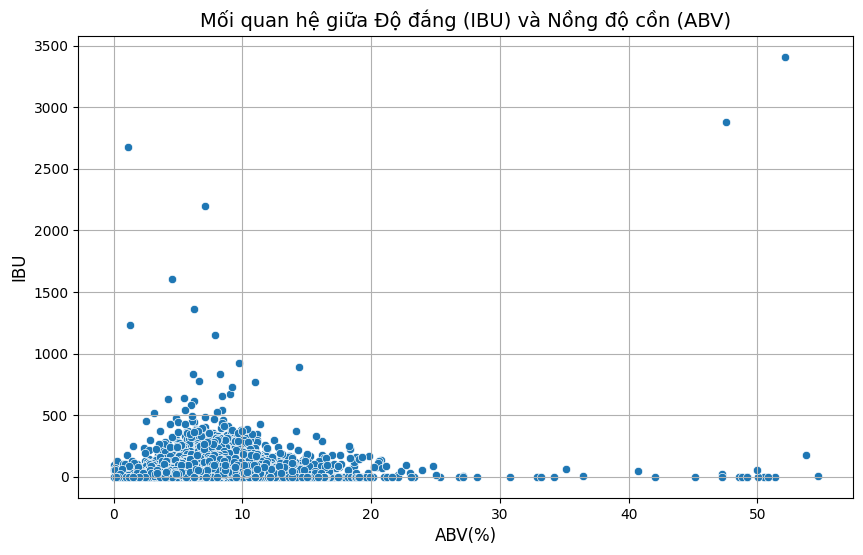

In [9]:
# code
x = df_simple_imputer['ABV']
y = df_simple_imputer['IBU']

plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y)

plt.xlabel('ABV(%)', fontsize=12)
plt.ylabel('IBU', fontsize=12)
plt.title('Mối quan hệ giữa Độ đắng (IBU) và Nồng độ cồn (ABV)', fontsize=14)
plt.grid(True)

plt.show()

*1.7. Display how many recipes belong to each beer style using the bar chart*

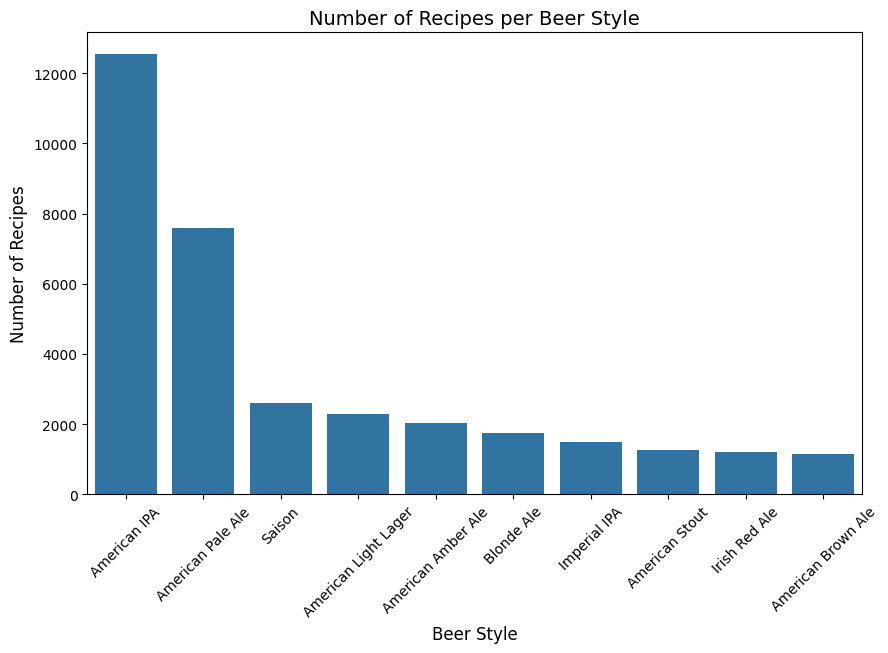

In [10]:
# code
beer_style_counts = df_simple_imputer['Style'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=beer_style_counts.index[:10], y=beer_style_counts.values[:10])

plt.xlabel('Beer Style', fontsize=12)
plt.ylabel('Number of Recipes', fontsize=12)
plt.title('Number of Recipes per Beer Style', fontsize=14)
plt.xticks(rotation=45)

plt.show()

*1.8. Show the distribution of brewing methods using pie chart (i.e., compare "All Grain" vs. "Extract" methods)*

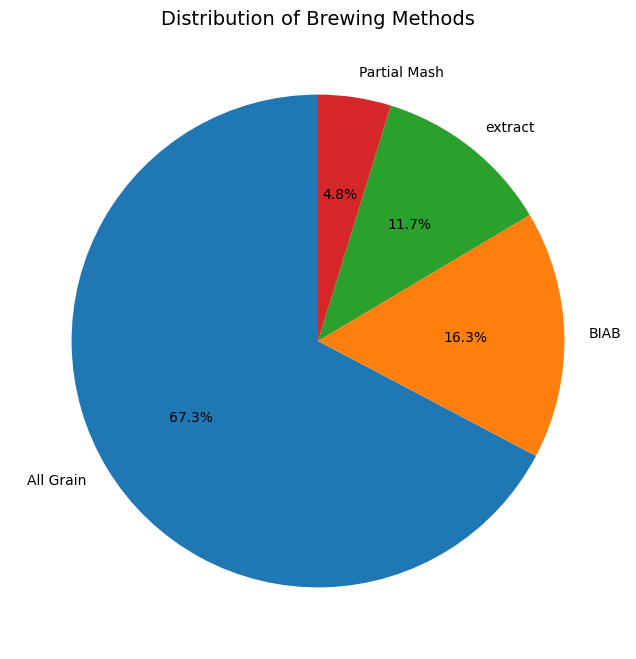

In [11]:
# code
brewing_method_counts = df_simple_imputer['BrewMethod'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(brewing_method_counts, labels=brewing_method_counts.index, autopct='%1.1f%%', startangle=90)

plt.title('Distribution of Brewing Methods', fontsize=14)

plt.show()

*1.9. Discretize BoilGravity (Gravity of the wort 1during boiling) values into 5 bins. Then, plot the histogram of BoilGravity to identify the most popular age
interval*

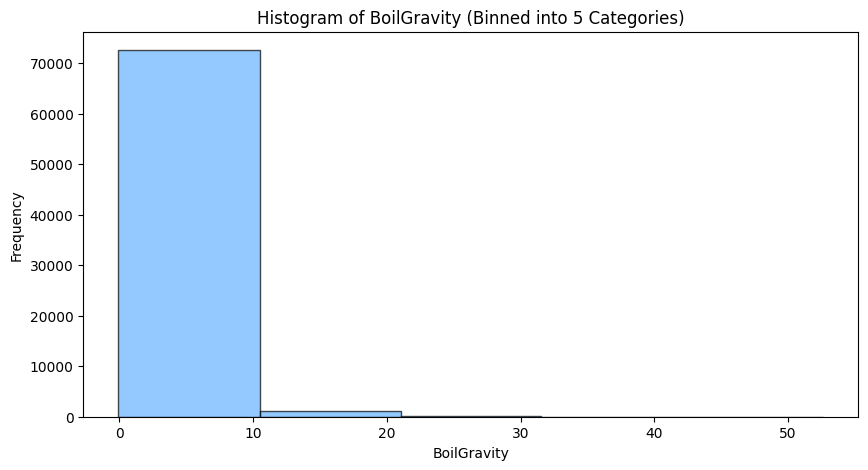

In [12]:
# code
df_simple_imputer['BoilGravity_binned'], bins = pd.cut(df_simple_imputer['BoilGravity'], bins=5, retbins=True)

plt.figure(figsize=(10, 5))
plt.hist(df_simple_imputer['BoilGravity'], bins=bins, edgecolor='black', alpha=0.7, color='#66b3ff')

plt.title('Histogram of BoilGravity (Binned into 5 Categories)')
plt.xlabel('BoilGravity')
plt.ylabel('Frequency')

plt.show()

In [13]:
# gia tri cua tung cot
print(df_simple_imputer[['BoilGravity', 'BoilGravity_binned']].head(10))
print(df_simple_imputer['BoilGravity_binned'].value_counts())


   BoilGravity BoilGravity_binned
0     1.038000   (-0.0526, 10.52]
1     1.070000   (-0.0526, 10.52]
2     1.353955   (-0.0526, 10.52]
3     1.353955   (-0.0526, 10.52]
4     1.050000   (-0.0526, 10.52]
5     1.047000   (-0.0526, 10.52]
6     1.353955   (-0.0526, 10.52]
7     1.040000   (-0.0526, 10.52]
8     1.042000   (-0.0526, 10.52]
9     1.058000   (-0.0526, 10.52]
BoilGravity_binned
(-0.0526, 10.52]    72602
(10.52, 21.04]       1203
(21.04, 31.56]         48
(31.56, 42.08]          6
(42.08, 52.6]           2
Name: count, dtype: int64


*1.10. Convert BrewMethod values into numeric values using dummy approach*

In [14]:
# code
df_encoded = pd.get_dummies(df_simple_imputer, columns=['BrewMethod'], prefix='BrewMethod', dtype=int)
df_encoded.head()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,PrimaryTemp,BoilGravity_binned,BrewMethod_All Grain,BrewMethod_BIAB,BrewMethod_Partial Mash,BrewMethod_extract
0,1.0,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45.0,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75.0,1.038000,70.0,2.127235,Specific Gravity,17.780000,"(-0.0526, 10.52]",1,0,0,0
1,2.0,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85.0,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60.0,1.070000,70.0,2.127235,Specific Gravity,19.175641,"(-0.0526, 10.52]",1,0,0,0
2,3.0,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7.0,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60.0,1.353955,70.0,2.127235,Specific Gravity,19.175641,"(-0.0526, 10.52]",0,0,0,1
3,4.0,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7.0,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60.0,1.353955,70.0,2.127235,Specific Gravity,19.175641,"(-0.0526, 10.52]",1,0,0,0
4,5.0,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20.0,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90.0,1.050000,72.0,2.127235,Specific Gravity,19.000000,"(-0.0526, 10.52]",1,0,0,0


*1.11 Apply StandardScaler to numerical attributes*

In [23]:
# code
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_knn_imputed), columns=df_knn_imputed.columns)
df_scaled.head()

,BeerID,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,PrimaryTemp
0,-1.732027,-0.267191,-0.122856,-0.159892,-0.145345,-0.348748,-0.620004,-0.717907,-0.110403,0.660613,-0.167040,0.258673,3.420232e-16,-0.397261
1,-1.731980,0.436897,-0.128123,-0.147147,-0.126849,1.074137,0.381272,0.187117,-0.129964,-0.337781,-0.150123,0.258673,3.420232e-16,0.000000
2,-1.731934,-0.936075,-0.138601,-0.156251,-0.133785,-0.120449,0.348672,-0.370465,-0.139796,-0.337781,0.000000,0.258673,3.420232e-16,0.000000
3,-1.731887,-0.936075,-0.117644,-0.157161,-0.136097,-0.178851,0.237601,-0.410651,-0.120184,-0.337781,0.000000,0.258673,3.420232e-16,0.000000
4,-1.731840,-0.707246,0.033654,-0.157616,-0.152281,0.182180,-0.615579,-0.739674,0.053171,1.659007,-0.160696,0.400602,3.420232e-16,-0.049995


*1.12. From the above tasks, provide some comments about trends and patterns in the given dataset.*

Dữ liệu bia cho thấy sự phân bố rõ ràng giữa các phương pháp nấu bia, với một phương pháp có thể chiếm ưu thế hơn. Độ đậm đặc của bia (Boil Gravity) có xu hướng tập trung vào một số khoảng phổ biến, phản ánh tiêu chuẩn chung trong sản xuất. Các chỉ số như OG, FG và ABV cho thấy mối quan hệ giữa độ lên men và nồng độ cồn. Độ đắng (IBU) có thể cho thấy xu hướng thị hiếu của người tiêu dùng. Sau khi chuẩn hóa dữ liệu bằng StandardScaler, các thuộc tính có trung bình ≈ 0 và độ lệch chuẩn ≈ 1, đảm bảo tính công bằng trong phân tích.

**Task 2. The given dataset (named dataset2.csv) focused on student evaluations with attributes like grades (English, Math, Sciences, Language) and ratings (portfolio, cover letter, reference letter), along with demographics like nationality, gender, and age. Perform the following tasks:**

In [26]:
#
df_dataset2 = pd.read_csv('drive/MyDrive/data/lab2/dataset2.csv', encoding='latin1')
df_dataset2.head()

,id,name,nationality,gender,ethnic.group,age,english.grade,math.grade,sciences.grade,language.grade,portfolio.rating,coverletter.rating,refletter.rating
0,0,Kiana Lor,China,F,NaN,22,3.5,3.7,3.1,1.0,4,4.0,4
1,1,Joshua Lonaker,United States of America,M,NaN,22,2.9,3.2,3.6,5.0,5,4.0,5
2,2,Dakota Blanco,United States of America,F,NaN,22,3.9,3.8,3.2,5.0,3,3.0,4
3,3,Natasha Yarusso,United States of America,F,NaN,20,3.3,2.8,3.2,5.0,5,2.0,4
4,4,Brooke Cazares,Brazil,F,NaN,21,3.7,2.6,3.4,1.0,4,4.0,5


2*.1. Display the general information of the dataset and provide a quick statistical summary of the columns in the dataset*

In [27]:
# code
df_dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  307 non-null    int64  
 1   name                307 non-null    object 
 2   nationality         307 non-null    object 
 3   gender              307 non-null    object 
 4   ethnic.group        0 non-null      float64
 5   age                 307 non-null    int64  
 6   english.grade       307 non-null    float64
 7   math.grade          307 non-null    float64
 8   sciences.grade      307 non-null    float64
 9   language.grade      307 non-null    float64
 10  portfolio.rating    307 non-null    int64  
 11  coverletter.rating  307 non-null    float64
 12  refletter.rating    307 non-null    int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 31.3+ KB


In [28]:
#
df_dataset2.describe()

,id,ethnic.group,age,english.grade,math.grade,sciences.grade,language.grade,portfolio.rating,coverletter.rating,refletter.rating
count,307.000000,0.0,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,153.000000,NaN,21.964169,3.369707,3.414332,3.446580,4.396417,3.986971,4.110749,4.188925
std,88.767487,NaN,1.248013,0.538724,0.476839,0.509081,0.996474,0.928749,0.823936,0.842193
min,0.000000,NaN,19.000000,1.500000,2.100000,1.400000,1.000000,1.000000,1.000000,1.000000
25%,76.500000,NaN,21.000000,3.100000,3.100000,3.200000,4.000000,3.500000,4.000000,4.000000
50%,153.000000,NaN,22.000000,3.500000,3.500000,3.600000,5.000000,4.000000,4.000000,4.000000
75%,229.500000,NaN,23.000000,3.800000,3.800000,3.800000,5.000000,5.000000,5.000000,5.000000
max,306.000000,NaN,26.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000


*2.2 Identify the missing rate for each attribute and the given dataset's general missing rate.*

In [30]:
# code
missing_rate_per_column_dataset2 = df_dataset2.isnull().mean() * 100
print(missing_rate_per_column_dataset2)

id                      0.0
name                    0.0
nationality             0.0
gender                  0.0
ethnic.group          100.0
age                     0.0
english.grade           0.0
math.grade              0.0
sciences.grade          0.0
language.grade          0.0
portfolio.rating        0.0
coverletter.rating      0.0
refletter.rating        0.0
dtype: float64


In [32]:
#
general_missing_rate_dataset2 = (df_dataset2.isnull().values.mean()) * 100
print(general_missing_rate_dataset2)

7.6923076923076925


*2.3. Drop attributes with high missing rates (i.e., > 50%)*

In [33]:
#
columns_to_drop_dataset2 = missing_rate_per_column_dataset2[missing_rate_per_column_dataset2 > 50].index
df_cleaned_dataset2 = df_dataset2.drop(columns=columns_to_drop_dataset2)
df_cleaned_dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  307 non-null    int64  
 1   name                307 non-null    object 
 2   nationality         307 non-null    object 
 3   gender              307 non-null    object 
 4   age                 307 non-null    int64  
 5   english.grade       307 non-null    float64
 6   math.grade          307 non-null    float64
 7   sciences.grade      307 non-null    float64
 8   language.grade      307 non-null    float64
 9   portfolio.rating    307 non-null    int64  
 10  coverletter.rating  307 non-null    float64
 11  refletter.rating    307 non-null    int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 28.9+ KB


*2.4. Apply box plot for each subject's grades (English, Math, Sciences, Language) to identify subjects that have higher/lower average grades*

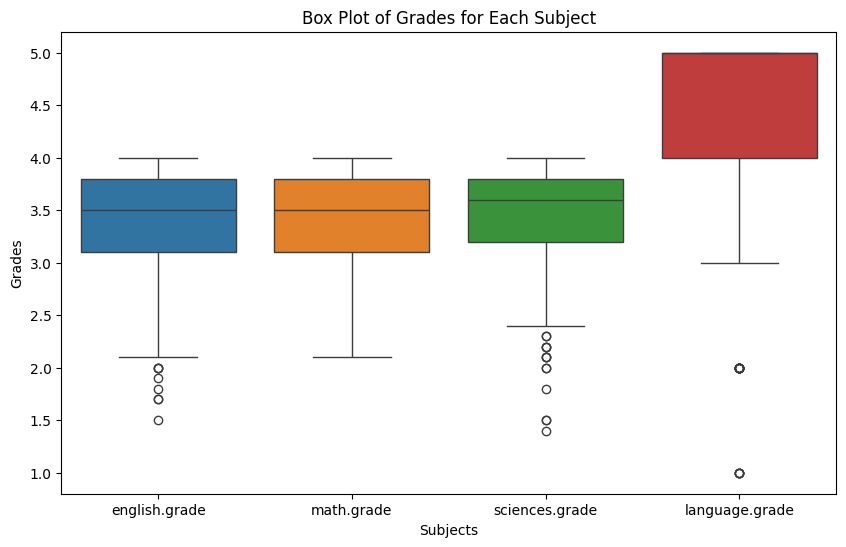

In [37]:
#
subjects_columns = ['english.grade', 'math.grade', 'sciences.grade', 'language.grade']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned_dataset2[subjects_columns])
plt.xlabel('Subjects')
plt.ylabel('Grades')
plt.title('Box Plot of Grades for Each Subject')
plt.show()

*2.5. Apply Pie chart to show the number of students from each nationality*

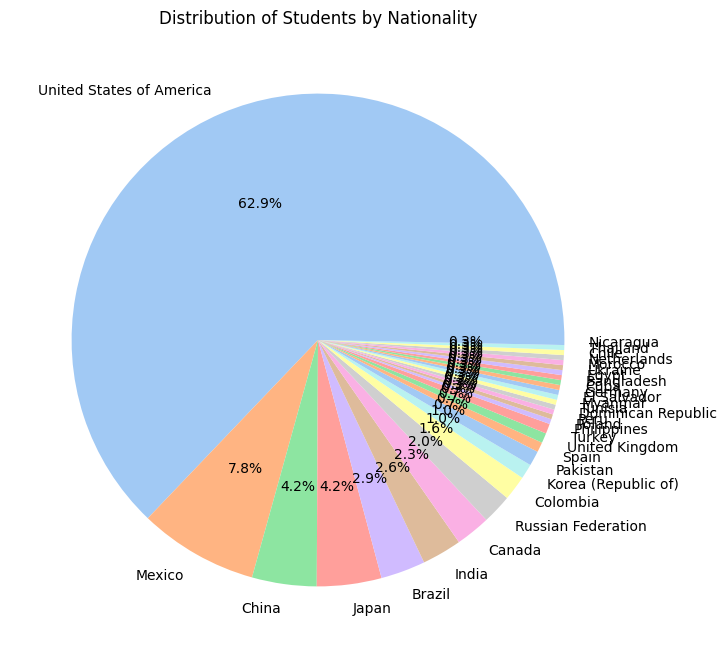

In [43]:
#
nationality_counts = df_cleaned_dataset2['nationality'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(nationality_counts, labels=nationality_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Distribution of Students by Nationality")
plt.ylabel("")
plt.show()

*2.6. Apply Bar chart showing average grades by gender*

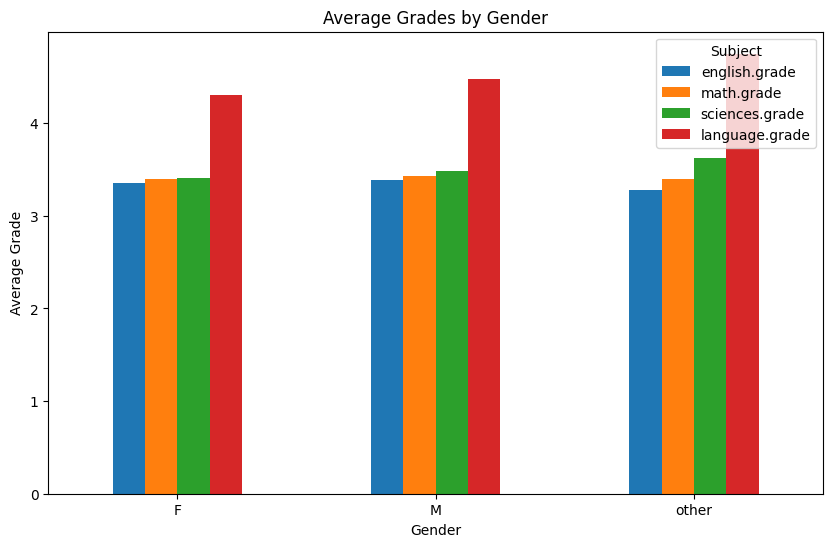

In [45]:
#
avg_grades_by_gender = df_cleaned_dataset2.groupby('gender')[subjects_columns].mean()

avg_grades_by_gender.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Gender')
plt.ylabel('Average Grade')
plt.title('Average Grades by Gender')
plt.legend(title='Subject')
plt.xticks(rotation=0)
plt.show()

*2.7. Apply Heatmap to find any correlation between ratings (i.e., 'portfolio.rating', 'coverletter.rating', 'refletter.rating')*

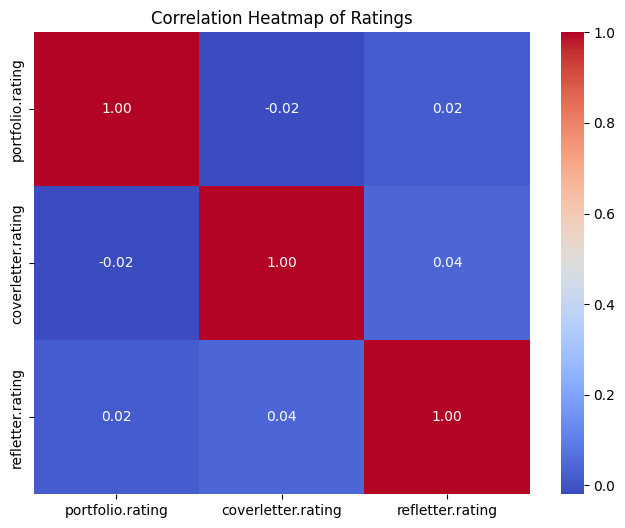

In [46]:
#
rating_columns = ['portfolio.rating', 'coverletter.rating', 'refletter.rating']
plt.figure(figsize=(8, 6))
sns.heatmap(df_cleaned_dataset2[rating_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Ratings')
plt.show()

*2.8. From the above tasks, provide some comments about trends and patterns in the given dataset.*

Tập dữ liệu chứa thông tin về điểm số và đánh giá sinh viên. Sau khi xử lý dữ liệu thiếu, ta thấy một số môn học có điểm trung bình cao hơn, trong khi một số môn có sự phân hóa rõ rệt giữa học sinh giỏi và yếu. Biểu đồ tròn cho thấy tỷ lệ học sinh theo quốc tịch không đồng đều, có thể do chính sách tuyển sinh. Biểu đồ cột cho thấy sự khác biệt về điểm số giữa nam và nữ, nhưng cần phân tích sâu hơn để xác định nguyên nhân. Heatmap giúp xác định mối tương quan giữa các tiêu chí đánh giá, từ đó có thể tinh chỉnh hệ thống đánh giá sinh viên. Nhìn chung, dữ liệu cho thấy sự đa dạng trong học tập và đánh giá sinh viên, đồng thời gợi ý các yếu tố có thể tối ưu trong quy trình tuyển sinh và đánh giá năng lực.